# HODMD library for simple function

1. Tensor Train-Based Higher-Order Dynamic Mode Decomposition for Dynamical Systems 
$$ f(x,t) = e^{-x^2/5} \cos(2x) \sqrt{1 + \frac{1}{2} \sin t}, $$

$$ x \in [-3, 3], \quad t \in [0, 4\pi]. $$

2. Algorithm DMD: 
![alt text](DMD.png)

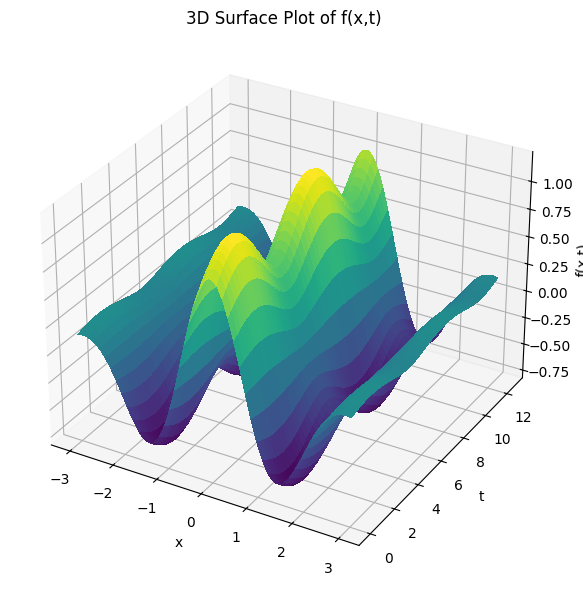

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pydmd import HODMD

x = np.linspace(-3, 3, 449)
t = np.linspace(0, 4 * np.pi, 1000)
X, T = np.meshgrid(x, t, indexing='ij')

f = np.exp(-X**2 / 5) * np.cos(2 * X) * np.sqrt(1 + 0.5 * np.sin(T))


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

X3d, T3d = np.meshgrid(x, t, indexing='ij')  # (449, 1000)
ax.plot_surface(X3d, T3d, f, cmap='viridis', linewidth=0, antialiased=False)

ax.set_title("3D Surface Plot of f(x,t)")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("f(x,t)")

plt.tight_layout()
plt.show()

# HODMD from library

c:\Python312\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 1.333332910588796e+36. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
c:\Python312\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 2.590281099461123e+16. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


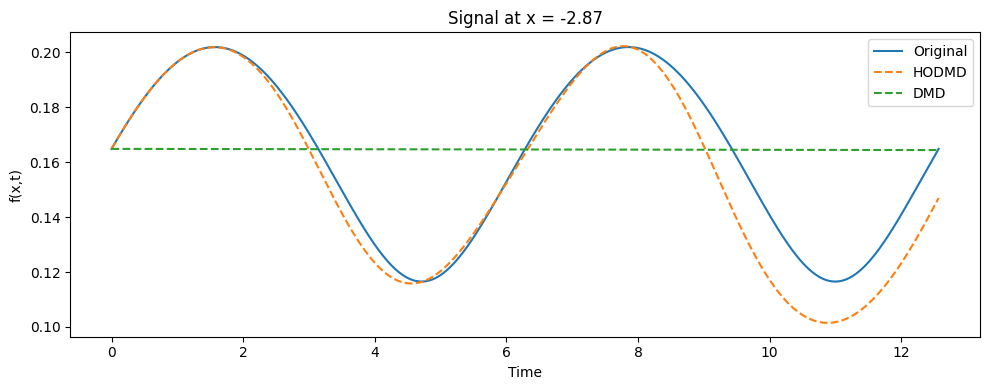

In [19]:
from pydmd import HODMD
import numpy as np
import matplotlib.pyplot as plt

# function
x = np.linspace(-3, 3, 449)
t = np.linspace(0, 4 * np.pi, 1000)
X_grid, T_grid = np.meshgrid(x, t, indexing='ij')
f = np.exp(-X_grid**2 / 5) * np.cos(2 * X_grid) * np.sqrt(1 + 0.5 * np.sin(T_grid))

# HODMD with delay d=50
hodmd = HODMD(svd_rank=10, d=50, exact=True)
hodmd.fit(f)

# As if it were normal DMD algorthm with d=1
hodmd_1 = HODMD(svd_rank=10, d=1, exact=True)
hodmd_1.fit(f)

X_dmd = hodmd.reconstructed_data.real  # Reconstructed signal
X_dmd_1 = hodmd_1.reconstructed_data.real  # Reconstructed signal

# Time signal at x[10]
plt.figure(figsize=(10, 4))
plt.plot(t, f[10, :], label='Original')
plt.plot(t[:X_dmd.shape[1]], X_dmd[10, :], '--', label='HODMD')
plt.plot(t[:X_dmd_1.shape[1]], X_dmd_1[10, :], '--', label='DMD')
plt.title("Signal at x = {:.2f}".format(x[10]))
plt.xlabel("Time")
plt.ylabel("f(x,t)")
plt.legend()
plt.tight_layout()

#  HODMD library for vortall.mat dataset

shape of VORTAL:,(89351, 100)


c:\Python312\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 7255171.591728224. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
c:\Python312\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 86074796.17607152. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


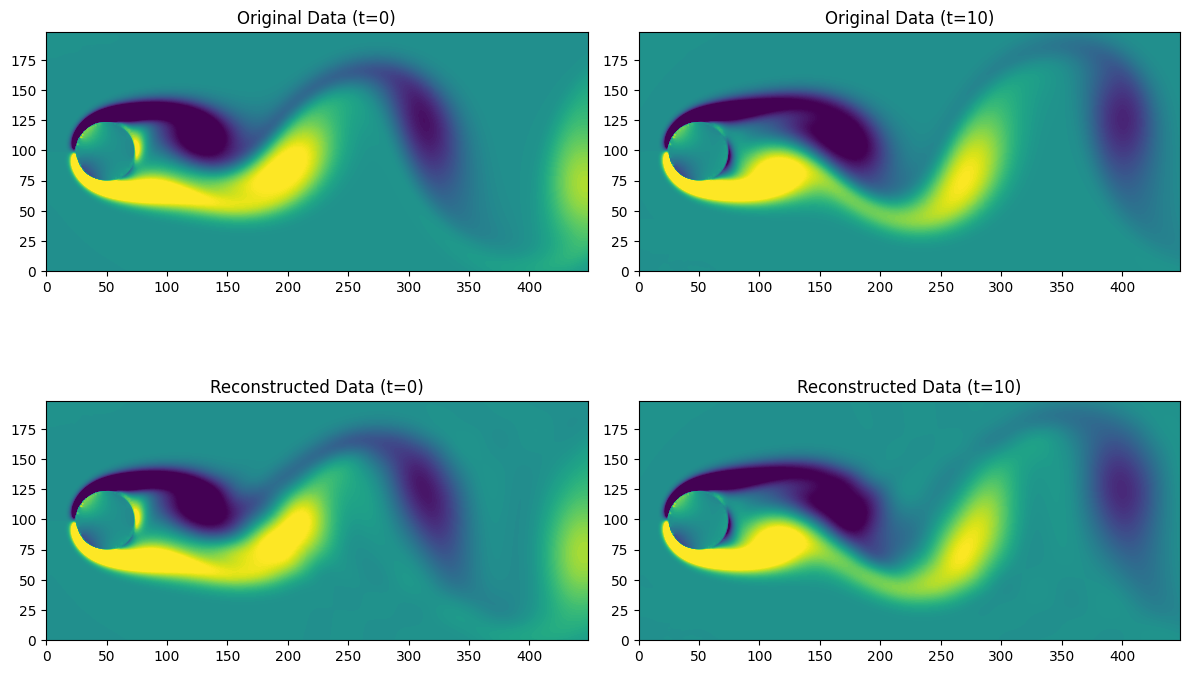

In [56]:
from pydmd import HODMD
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

vortall_mat = io.loadmat('VORTALL.mat')
X = vortall_mat['VORTALL'][:, :100]  # Limit to 100 time steps

print(f'shape of VORTAL:{np.shape(X)}')
T = X.shape[1]
m, n = 199, 449  

# example for rank 10 and dilation 50
hodmd = HODMD(svd_rank=10, d=50, exact=True)  
hodmd.fit(X)

# Reconstructed data
X_dmd = hodmd.reconstructed_data.real

# Plot 
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Original data at t=0
ax[0, 0].contourf(np.reshape(X[:, 0], (n, m)).T, levels=1001, vmin=-2, vmax=2)
ax[0, 0].set_title("Original Data (t=0)")
ax[0, 0].set_aspect('equal')

# Original data at t=10
ax[0, 1].contourf(np.reshape(X[:, 10], (n, m)).T, levels=1001, vmin=-2, vmax=2)
ax[0, 1].set_title("Original Data (t=10)")
ax[0, 1].set_aspect('equal')

# Reconstructed data at t=0
ax[1, 0].contourf(np.reshape(X_dmd[:, 0], (n, m)).T, levels=1001, vmin=-2, vmax=2)
ax[1, 0].set_title("Reconstructed Data (t=0)")
ax[1, 0].set_aspect('equal')

# Reconstructed data at t=10
ax[1, 1].contourf(np.reshape(X_dmd[:, 10], (n, m)).T, levels=1001, vmin=-2, vmax=2)
ax[1, 1].set_title("Reconstructed Data (t=10)")
ax[1, 1].set_aspect('equal')

plt.tight_layout()
plt.show()

# DMD Algorthm or HODMD = 1

1. $
\mathbf{X}=\mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^{\mathbf{T}} \approx \widetilde{\mathbf{U}} \widetilde{\mathbf{\Sigma}} \widetilde{\mathbf{V}}^{\mathbf{T}}
$

2. $
\begin{aligned}
& A=X^{\prime} X^{+}=X^{\prime}\left(\widetilde{U} \widetilde{\Sigma} \widetilde{V}^T\right)^{+}=X^{\prime} \widetilde{V} \widetilde{\Sigma}^{-1} \widetilde{U}^T \\
& \widetilde{A}=\widetilde{U}^T \mathbf{A} \widetilde{U}=\widetilde{U}^T \mathbf{X}^{\prime} \widetilde{V} \widetilde{\Sigma}^{-1}
\end{aligned}
$ 

3. $
\widetilde{A} W=W \Lambda
$

4. $
\Phi=X^{\prime} \widetilde{V} \widetilde{\Sigma}^{-1} W
$

5. $\mathbf{b}=\boldsymbol{\Phi}^{+} \boldsymbol{x}(\boldsymbol{t}=\mathbf{0})$

6. $\mathbf{x}_k=\sum_{j=1}^r \boldsymbol{\phi}_j \lambda_j^{k-1} b_j=\boldsymbol{\Phi} \mathbf{\Lambda}^{k-1} \mathbf{b}$


CPU times: total: 11.9 s
Wall time: 5.56 s


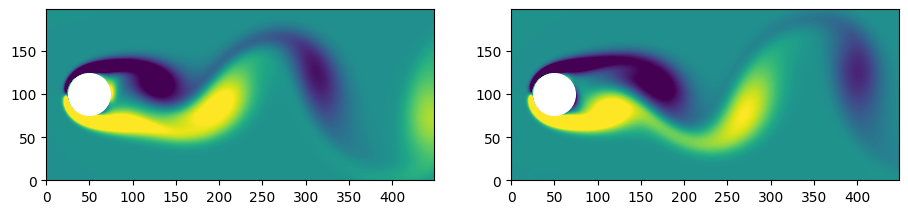

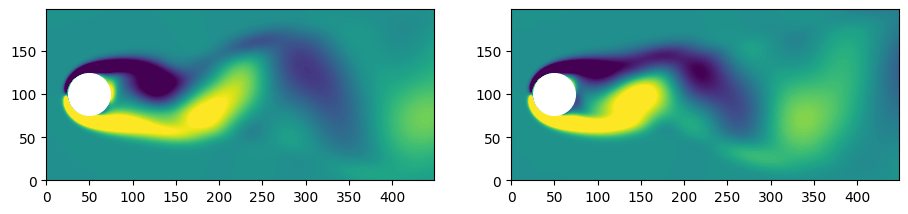

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def main():

    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL']
    X = X[:, :100]
    T = X.shape[1]

    m = 199
    n = 499

    fig, ax = plt.subplots(1, 2, figsize=(11, 4))

    ax[0].contourf(np.real(np.reshape(X[:, 0], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[0].scatter(50, 100, 900, color='white', zorder=2)  
    ax[0].set_aspect('equal')

    ax[1].contourf(np.real(np.reshape(X[:, 10], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[1].scatter(50, 100, 900, color='white', zorder=2)
    ax[1].set_aspect('equal')

    # DMD algorthm
    def DMD(X1, X2, r, dt):
        # 1. Singular value decomposition
        U, s, Vh = np.linalg.svd(X1, full_matrices=False)
        Ur = U[:, :r] # spatial modes
        Sr = np.diag(s[:r]) # weights
        Vr = Vh.conj().T[:, :r] # temporal modes

        # 2. Computing pseudo-inverse with projection in space modes because A is big
        Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr) #shape r by r 

        # 3. Eigenvectors decomposition to project then back to 
        Lambda, W = np.linalg.eig(Atilde)

        # 4. Get back into the high dimentional space , eignevalues dont change
        Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W

        # 5. frecuencies
        omega = np.log(Lambda) / dt

        # 5. Amplitud vector 
        alpha1 = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]
        
        # 6. DMD expansion
        time_dynamics = None
        for i in range(X1.shape[1]):
            v = np.array(alpha1)[:, 0] * np.exp(np.array(omega) * (i - 1) * dt)
            if time_dynamics is None:
                time_dynamics = v
            else:
                time_dynamics = np.vstack((time_dynamics, v))

        X_dmd = np.dot(np.array(Phi), time_dynamics.T)

        return Phi, omega, Lambda, alpha1,  X_dmd, time_dynamics.T

    # Data
    X1 = np.matrix(X[:, 0:-1])
    X2 = np.matrix(X[:, 1:])
    DMD_rank = 5
    dt = T * 0.001

    # Call DMD
    Phi, omega, Lambda, alpha1,  X_dmd, time_dynamics = DMD(X1, X2, DMD_rank, dt)

    # Plot DMD reconstructed\
    
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))

    ax[0].contourf(np.real(np.reshape(X_dmd[:, 0], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[0].scatter(50, 100, 900, color='white', zorder=2)  # draw cylinder
    ax[0].set_aspect('equal')

    ax[1].contourf(np.real(np.reshape(X_dmd[:, 20], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[1].scatter(50, 100, 900, color='white', zorder=2)  # draw cylinder
    ax[1].set_aspect('equal')

%time main()

# RMSE with different truncation values , RMSE plot

Rank 1: RMSE = 0.547984
Rank 5: RMSE = 0.156217
Rank 10: RMSE = 0.034571
Rank 15: RMSE = 0.005698
Rank 20: RMSE = 0.001629
Rank 25: RMSE = 0.000221


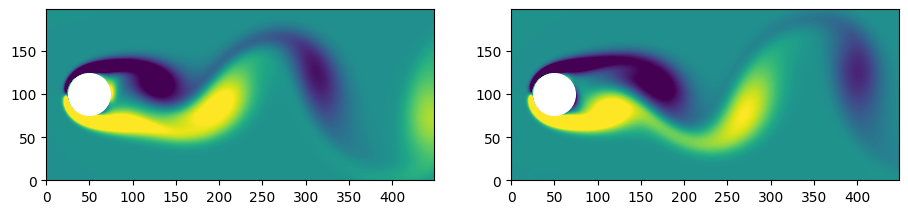

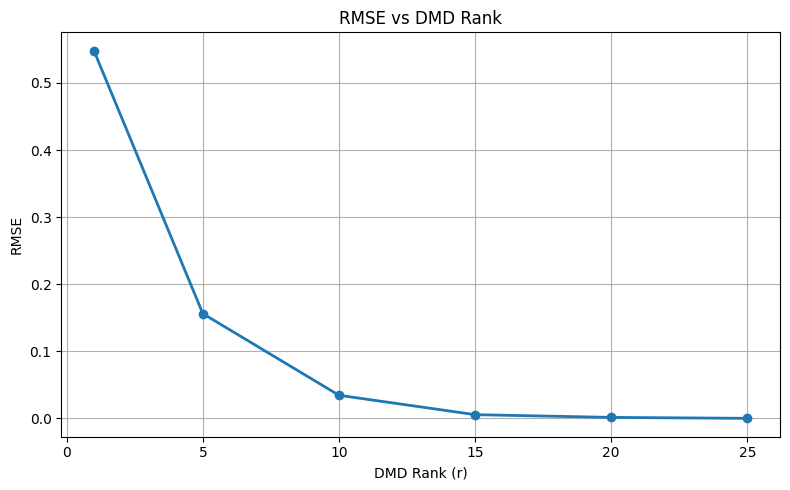

CPU times: total: 48.4 s
Wall time: 12.8 s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL']
    X = X[:, :100]
    T = X.shape[1]

    m = 199
    n = 449  # fixed typo: previously 499

    #plot original data
    # fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    # ax[0].contourf(np.real(np.reshape(X[:, 0], (n, m))).T, levels=1001, vmin=-2, vmax=2)
    # ax[0].scatter(50, 100, 900, color='white', zorder=2)
    # ax[0].set_aspect('equal')

    # ax[1].contourf(np.real(np.reshape(X[:, 10], (n, m))).T, levels=1001, vmin=-2, vmax=2)
    # ax[1].scatter(50, 100, 900, color='white', zorder=2)
    # ax[1].set_aspect('equal')

    # DMD algorithm
    def DMD(X1, X2, r, dt):
        U, s, Vh = np.linalg.svd(X1, full_matrices=False)
        Ur = U[:, :r]
        Sr = np.diag(s[:r])
        Vr = Vh.conj().T[:, :r]
        Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr)
        Lambda, W = np.linalg.eig(Atilde)
        Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W
        omega = np.log(Lambda) / dt
        alpha1 = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]

        time_dynamics = None
        for i in range(X1.shape[1]):
            v = np.array(alpha1)[:, 0] * np.exp(np.array(omega) * (i + 1) * dt)
            if time_dynamics is None:
                time_dynamics = v
            else:
                time_dynamics = np.vstack((time_dynamics, v))

        X_dmd = np.dot(np.array(Phi), time_dynamics.T)
        return Phi, omega, Lambda, alpha1, X_dmd, time_dynamics.T

    # Prepare data
    X1 = np.matrix(X[:, 0:-1])
    X2 = np.matrix(X[:, 1:])
    DMD_rank = 11
    dt = T * 0.001

    # Run DMD for different ranks
    ranks = [1, 5, 10, 15, 20, 25]
    errors = []

    for r in ranks:
        Phi, omega, Lambda, alpha1, X_dmd, time_dynamics = DMD(X1, X2, r, dt)
        error = np.sqrt(np.mean((np.real(X[:, 1:]) - np.real(X_dmd))**2))
        errors.append(error)
        print(f"Rank {r}: RMSE = {error:.6f}")

    # Plot RMSE vs Rank
    plt.figure(figsize=(8, 5))
    plt.plot(ranks, errors, 'o-', lw=2)
    plt.xlabel("DMD Rank (r)")
    plt.ylabel("RMSE")
    plt.title("RMSE vs DMD Rank")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot DMD reconstructed results
    # fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    # ax[0].contourf(np.real(np.reshape(X_dmd[:, 0], (n, m))).T, levels=1001, vmin=-2, vmax=2)
    # ax[0].scatter(50, 100, 900, color='white', zorder=2)
    # ax[0].set_aspect('equal')

    # ax[1].contourf(np.real(np.reshape(X_dmd[:, 20], (n, m))).T, levels=1001, vmin=-2, vmax=2)
    # ax[1].scatter(50, 100, 900, color='white', zorder=2)
    # ax[1].set_aspect('equal')

%time main()

# HODMD

- Captures temporal correlation across multiple time steps.
- Improves spectral resolution of DMD.
- Enhances robustness to noise and undersampled data.
- Related to concepts from dynamical systems like Takens' Embedding Theorem.

1. Delay Embedding (HODMD)

Construct a delayed matrix by stacking $d$ time-shifted versions of the original data matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$:

$$
\mathbf{X}_{\text{aug}} = 
\begin{bmatrix}
\mathbf{x}_1 & \cdots & \mathbf{x}_{n-d+1} \\
\mathbf{x}_2 & \cdots & \mathbf{x}_{n-d+2} \\
\vdots & \ddots & \vdots \\
\mathbf{x}_d & \cdots & \mathbf{x}_{n}
\end{bmatrix}
\in \mathbb{R}^{md \times (n - d + 1)}
$$

Split into two matrices:
- $\mathbf{X}_1 = \mathbf{X}_{\text{aug}}[:, :-1]$
- $\mathbf{X}_2 = \mathbf{X}_{\text{aug}}[:, 1:]$

---

2. Truncated SVD with Energy Threshold

Apply singular value decomposition (SVD) to $\mathbf{X}_1$:

$$
\mathbf{X}_1 = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T \approx \widetilde{\mathbf{U}} \widetilde{\boldsymbol{\Sigma}} \widetilde{\mathbf{V}}^T
$$

Choose rank $r$ either manually or via an energy threshold:

$$
\frac{\sum_{i=r+1}^{k} \sigma_i^2}{\sum_{i=1}^{k} \sigma_i^2} \leq \epsilon
$$

---

3. Reduced Operator Construction

Compute the low-dimensional approximation of the Koopman operator:

$$
\begin{aligned}
A &= \mathbf{X}_2 \mathbf{X}_1^{+} = \mathbf{X}_2 \left( \widetilde{\mathbf{U}} \widetilde{\boldsymbol{\Sigma}} \widetilde{\mathbf{V}}^T \right)^{+} \\
&= \mathbf{X}_2 \widetilde{\mathbf{V}} \widetilde{\boldsymbol{\Sigma}}^{-1} \widetilde{\mathbf{U}}^T
\end{aligned}
$$

Project into reduced space:

$$
\widetilde{A} = \widetilde{\mathbf{U}}^T \mathbf{A} \widetilde{\mathbf{U}} = \widetilde{\mathbf{U}}^T \mathbf{X}_2 \widetilde{\mathbf{V}} \widetilde{\boldsymbol{\Sigma}}^{-1}
$$

---

4. Eigendecomposition

Solve the eigenvalue problem:

$$
\widetilde{A} \mathbf{W} = \mathbf{W} \boldsymbol{\Lambda}
$$

---

5. Reconstruct DMD Modes

Map reduced eigenvectors back to high-dimensional space:

$$
\boldsymbol{\Phi} = \mathbf{X}_2 \widetilde{\mathbf{V}} \widetilde{\boldsymbol{\Sigma}}^{-1} \mathbf{W}
$$

---

6. Compute Initial Amplitudes

Project the initial state onto the DMD modes:

$$
\mathbf{b} = \boldsymbol{\Phi}^{+} \mathbf{x}(t=0)
$$

---

7. Reconstruct Time Dynamics

Reconstruct the system for each time step $k$:

$$
\mathbf{x}_k = \sum_{j=1}^r \phi_j \lambda_j^{k-1} b_j = \boldsymbol{\Phi} \boldsymbol{\Lambda}^{k-1} \mathbf{b}
$$

Or in matrix form:

$$
\mathbf{X}_{\text{DMD}} = \boldsymbol{\Phi}
\begin{bmatrix}
\mathbf{b} & \boldsymbol{\Lambda} \mathbf{b} & \boldsymbol{\Lambda}^2 \mathbf{b} & \cdots
\end{bmatrix}
$$


## Example

$$
X = \begin{bmatrix}
| & | & | & \cdots & | \\
x_1 & x_2 & x_3 & \cdots & x_9 \\
| & | & | & \cdots & |
\end{bmatrix}
\in \mathbb{R}^{n \times 9}
$$

## Delayed Snapshot Matrix with \( d = 3 \)
$$
\text{Column } i =
\begin{bmatrix}
x_i \\
x_{i+1} \\
x_{i+2}
\end{bmatrix}
$$

This gives us \( m - d + 1 = 7 \) columns. So the resulting matrix is:

$$
X_{\text{aug}} =
\begin{bmatrix}
x_1 & x_2 & x_3 & x_4 & x_5 & x_6 & x_7 \\
x_2 & x_3 & x_4 & x_5 & x_6 & x_7 & x_8 \\
x_3 & x_4 & x_5 & x_6 & x_7 & x_8 & x_9 \\
\end{bmatrix}
\in \mathbb{R}^{3n \times 7}
$$

Each column is a vector of length \( 3n \) — the result of stacking 3 consecutive states.




## Horizontal Delay Embedding with \( d = 3 \)

We construct a delayed snapshot matrix by stacking each delayed group horizontally:

Each row of the new matrix is:
$$
\text{Row } i =
\begin{bmatrix}
x_i^\top & x_{i+1}^\top & x_{i+2}^\top
\end{bmatrix}
\in \mathbb{R}^{1 \times 3n}
$$

This gives us:
$$
X_{\text{aug}} =
\begin{bmatrix}
x_1^\top & x_2^\top & x_3^\top \\
x_2^\top & x_3^\top & x_4^\top \\
x_3^\top & x_4^\top & x_5^\top \\
x_4^\top & x_5^\top & x_6^\top \\
x_5^\top & x_6^\top & x_7^\top \\
x_6^\top & x_7^\top & x_8^\top \\
x_7^\top & x_8^\top & x_9^\top \\
\end{bmatrix}
\in \mathbb{R}^{7 \times 3n}
$$

x1shape 71
Selected rank r = 33 based on energy threshold 1e-10
x_dmd (7148080, 71)
(89351, 72)


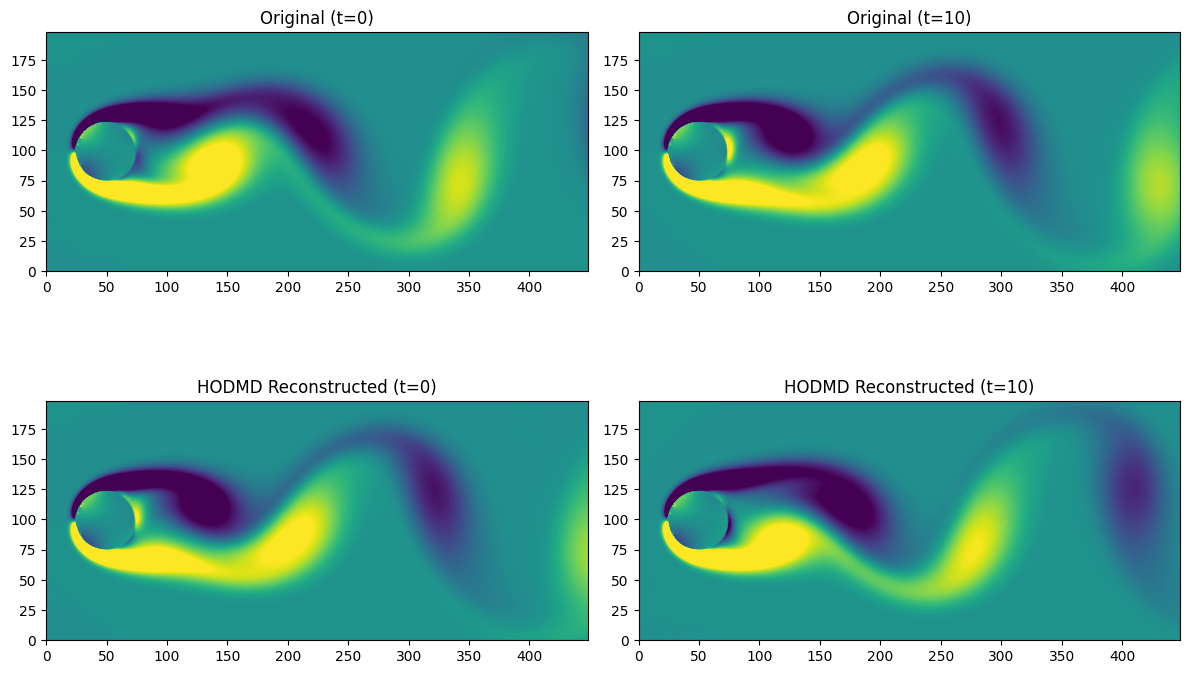

CPU times: total: 10min 30s
Wall time: 2min 49s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def delayed_matrix(X, delay):
    n, t = X.shape
    cols = t - delay + 1
    X_delayed = [X[:, i:i+cols] for i in range(delay)]
    return np.vstack(X_delayed)

def tolerance(S, threshold=1e-6):
    S_squared = S**2
    total_energy = np.sum(S_squared)
    cumulative = np.cumsum(S_squared[::-1])[::-1]
    EE = cumulative / total_energy
    N = np.argmax(EE <= threshold)
    return int(N)

def HODMD(X, delay, energy_threshold, dt):
    X_aug = delayed_matrix(X, delay)
    X1 = X_aug[:, :-1]
    X2 = X_aug[:, 1:]

    U, S, Vh = np.linalg.svd(X1, full_matrices=False)
    r = tolerance(S, energy_threshold)

    Ur = U[:, :r].astype(np.complex128)
    Sr = np.diag(S[:r]).astype(np.complex128)
    Vr = Vh.conj().T[:, :r].astype(np.complex128)

    Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr)
    Lambda, W = np.linalg.eig(Atilde)
    Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W
    omega = np.log(Lambda) / dt

    b = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]

    time_dynamics = np.zeros((r, X1.shape[1]), dtype=np.complex128)
    print("x1shape",X1.shape[1])
    
    for i in range(X1.shape[1]):
        time_dynamics[:, i] = np.exp(omega * ((i + 1) * dt)) * b

    X_dmd = Phi @ time_dynamics
    return X_dmd, r

def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL']#[:, :100]  
    m, n = 199, 449 
    delay = 80
    dt = 1.0  
    energy_threshold = 1e-10

    X_dmd, r = HODMD(X, delay, energy_threshold, dt)
    print(f"Selected rank r = {r} based on energy threshold {energy_threshold}")
    print("x_dmd",X_dmd.shape)

    X_trimmed = X[:, delay - 1:]
    print(X_trimmed.shape)

    X_dmd_trimmed = X_dmd[:449*199,:]
    
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    ax[0, 0].contourf(np.reshape(X_trimmed[:, 0], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[0, 0].set_title("Original (t=0)")
    ax[0, 0].set_aspect('equal')

    ax[0, 1].contourf(np.reshape(X_trimmed[:, 10], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[0, 1].set_title("Original (t=10)")
    ax[0, 1].set_aspect('equal')

    ax[1, 0].contourf(np.reshape(X_dmd_trimmed[:, 0], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[1, 0].set_title("HODMD Reconstructed (t=0)")
    ax[1, 0].set_aspect('equal')

    ax[1, 1].contourf(np.reshape(X_dmd_trimmed[:, 10], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[1, 1].set_title("HODMD Reconstructed (t=10)")
    ax[1, 1].set_aspect('equal')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()


# RMSE vs different D values (showed error) 

Original data X shape: (89351, 151) (n=89351, t=151)

--- Delay = 10 ---
[vstack] X_aug_v shape: (893510, 142)
[vstack] X1_v shape: (893510, 141)
[vstack] X2_v shape: (893510, 141)
[vstack] X_dmd shape: (893510, 141)


C:\Users\Cleison\AppData\Local\Temp\ipykernel_17412\1683126921.py:79: ComplexWarning: Casting complex values to real discards the imaginary part
  X_pred_v = X_dmd_v[:, :X_true_v.shape[1]].astype(np.float64)


[vstack] X_true shape: (893510, 141)
[vstack] RMSE: 0.163712
[hstack] X_aug_h shape: (893510, 142)
[hstack] X1_h shape: (893510, 141)
[hstack] X2_h shape: (893510, 141)
[hstack] X_dmd shape: (893510, 141)


C:\Users\Cleison\AppData\Local\Temp\ipykernel_17412\1683126921.py:100: ComplexWarning: Casting complex values to real discards the imaginary part
  X_pred_h = X_dmd_h[:, :X_true_h.shape[1]].astype(np.float64)


[hstack] X_true shape: (893510, 141)
[hstack] RMSE: 0.163712

--- Delay = 30 ---
[vstack] X_aug_v shape: (2680530, 122)
[vstack] X1_v shape: (2680530, 121)
[vstack] X2_v shape: (2680530, 121)
[vstack] X_dmd shape: (2680530, 121)
[vstack] X_true shape: (2680530, 121)
[vstack] RMSE: 0.163720
[hstack] X_aug_h shape: (2680530, 122)
[hstack] X1_h shape: (2680530, 121)
[hstack] X2_h shape: (2680530, 121)
[hstack] X_dmd shape: (2680530, 121)
[hstack] X_true shape: (2680530, 121)
[hstack] RMSE: 0.163720

--- Delay = 40 ---
[vstack] X_aug_v shape: (3574040, 112)
[vstack] X1_v shape: (3574040, 111)
[vstack] X2_v shape: (3574040, 111)
[vstack] X_dmd shape: (3574040, 111)
[vstack] X_true shape: (3574040, 111)
[vstack] RMSE: 0.163717
[hstack] X_aug_h shape: (3574040, 112)
[hstack] X1_h shape: (3574040, 111)
[hstack] X2_h shape: (3574040, 111)
[hstack] X_dmd shape: (3574040, 111)
[hstack] X_true shape: (3574040, 111)
[hstack] RMSE: 0.163717

--- Delay = 60 ---
[vstack] X_aug_v shape: (5361060, 92)
[

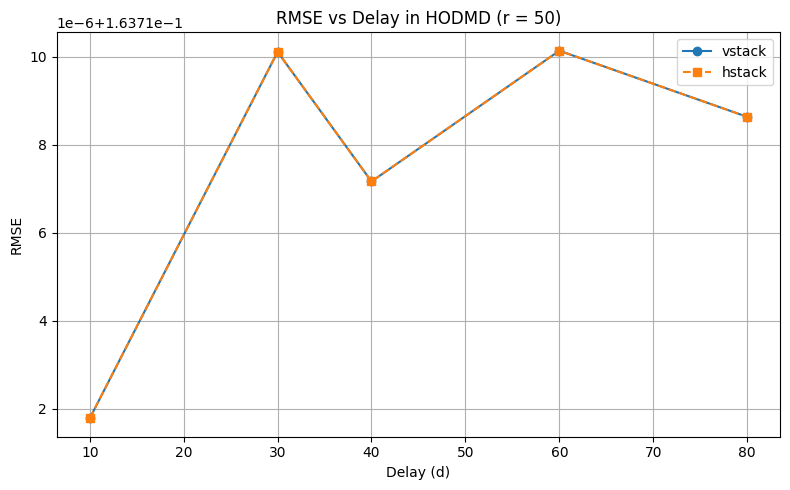

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def delayed_matrix(X, delay):
    n, t = X.shape
    cols = t - delay + 1
    return np.vstack([X[:, i:i+cols] for i in range(delay)])

def delayed_matrix_hstack(X, delay):
    n, t = X.shape
    rows = t - delay + 1
    return np.hstack([X[:, i:i+rows].T for i in range(delay)]).reshape(rows, -1).T

def tolerance(S, threshold=1e-6):
    S_squared = S**2
    total_energy = np.sum(S_squared)
    cumulative = np.cumsum(S_squared[::-1])[::-1]
    EE = cumulative / total_energy
    N = np.argmax(EE <= threshold)
    return int(N)

def HODMD(X_aug, dt, r=50):
    X1 = X_aug[:, :-1]
    X2 = X_aug[:, 1:]

    U, S, Vh = np.linalg.svd(X1, full_matrices=False)

    Ur = U[:, :r].astype(np.complex128)
    Sr = np.diag(S[:r]).astype(np.complex128)
    Vr = Vh.conj().T[:, :r].astype(np.complex128)

    Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr)
    Lambda, W = np.linalg.eig(Atilde)
    Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W

    omega = np.log(Lambda) / dt
    alpha1 = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]

    time_dynamics = np.array([alpha1 * np.exp(omega * (i + 1) * dt) for i in range(X1.shape[1])])
    time_dynamics = time_dynamics.T

    X_dmd = Phi @ time_dynamics
    return X_dmd



def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL']  # shape (n, t)
    print(f"Original data X shape: {X.shape} (n={X.shape[0]}, t={X.shape[1]})")

    dt = 1.0
    energy_threshold = 1e-5
    delays = [10, 30, 40, 60 , 80]
    r = 50

    errors_vstack = []
    errors_hstack = []

    for delay in delays:
        print(f"\n--- Delay = {delay} ---")

        # =======================
        # VSTACK VERSION
        # =======================
        X_aug_v = delayed_matrix(X, delay)
        print(f"[vstack] X_aug_v shape: {X_aug_v.shape}")

        X1_v = X_aug_v[:, :-1]
        X2_v = X_aug_v[:, 1:]
        print(f"[vstack] X1_v shape: {X1_v.shape}")
        print(f"[vstack] X2_v shape: {X2_v.shape}")

        X_dmd_v = HODMD(X_aug_v, dt, r)
        print(f"[vstack] X_dmd shape: {X_dmd_v.shape}")

        X_true_v = X1_v.astype(np.float64)
        X_pred_v = X_dmd_v[:, :X_true_v.shape[1]].astype(np.float64)
        rmse_v = np.sqrt(np.mean((X_pred_v - X_true_v) ** 2))
        print(f"[vstack] X_true shape: {X_true_v.shape}")
        print(f"[vstack] RMSE: {rmse_v:.6f}")
        errors_vstack.append(rmse_v)

        # =======================
        # HSTACK VERSION
        # =======================
        X_aug_h = delayed_matrix_hstack(X, delay)
        print(f"[hstack] X_aug_h shape: {X_aug_h.shape}")

        X1_h = X_aug_h[:, :-1]
        X2_h = X_aug_h[:, 1:]
        print(f"[hstack] X1_h shape: {X1_h.shape}")
        print(f"[hstack] X2_h shape: {X2_h.shape}")

        X_dmd_h = HODMD(X_aug_h, dt, r)
        print(f"[hstack] X_dmd shape: {X_dmd_h.shape}")

        X_true_h = X1_h.astype(np.float64)
        X_pred_h = X_dmd_h[:, :X_true_h.shape[1]].astype(np.float64)
        rmse_h = np.sqrt(np.mean((X_pred_h - X_true_h) ** 2))
        print(f"[hstack] X_true shape: {X_true_h.shape}")
        print(f"[hstack] RMSE: {rmse_h:.6f}")
        errors_hstack.append(rmse_h)

    # =======================
    # PLOT RESULTS
    # =======================
    plt.figure(figsize=(8, 5))
    plt.plot(delays, errors_vstack, 'o-', label="vstack")
    plt.plot(delays, errors_hstack, 's--', label="hstack")
    plt.xlabel("Delay (d)")
    plt.ylabel("RMSE")
    plt.title(f"RMSE vs Delay in HODMD (r = {r})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()


In [ ]:
# error due to not constant rank and not including same tolerance 

import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def delayed_matrix(X, delay):
    n, t = X.shape
    cols = t - delay + 1
    X_delayed = [X[:, i:i+cols] for i in range(delay)]
    return np.vstack(X_delayed)

def tolerance(S, threshold=1e-6):
    S_squared = S**2
    total_energy = np.sum(S_squared)
    cumulative = np.cumsum(S_squared[::-1])[::-1]
    EE = cumulative / total_energy
    N = np.argmax(EE <= threshold)
    return int(N)

def HODMD(X, delay, energy_threshold, dt):
    X_aug = delayed_matrix(X, delay)
    X1 = X_aug[:, :-1]
    X2 = X_aug[:, 1:]

    U, S, Vh = np.linalg.svd(X1, full_matrices=False)
    # r = tolerance(S, energy_threshold)
    r = 41

    Ur = U[:, :r].astype(np.complex128)
    Sr = np.diag(S[:r]).astype(np.complex128)
    Vr = Vh.conj().T[:, :r].astype(np.complex128)

    Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr)
    Lambda, W = np.linalg.eig(Atilde)
    Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W
    omega = np.log(Lambda) / dt

    b = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]

    time_dynamics = np.zeros((r, X1.shape[1]), dtype=np.complex128)
    for i in range(X1.shape[1]):
        time_dynamics[:, i] = np.exp(omega * ((i + 1) * dt)) * b

    X_dmd = Phi @ time_dynamics
    return X_dmd.real, r

def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL'][:, :100]  
    m, n = 199, 449
    dt = 1.0
    energy_threshold = 1e-4

    delays = [1, 6, 10 , 20, 30 , 35]
    errors = []
    ranks = []

    for delay in delays:
        print(f"\nRunning HODMD with delay = {delay}")
        X_dmd, r = HODMD(X, delay, energy_threshold, dt)

        X_delayed_true = delayed_matrix(X, delay)[:, :-1]
        min_t = min(X_delayed_true.shape[1], X_dmd.shape[1])
        X_delayed_true = X_delayed_true[:, :min_t]
        X_dmd = X_dmd[:, :min_t]

        rmse = np.sqrt(np.mean((X_delayed_true - X_dmd) ** 2))
        errors.append(rmse)
        ranks.append(r)
        print(f"Delay d = {delay}, Rank r = {r}, RMSE = {rmse:.6f}")

    plt.figure(figsize=(8, 5))
    plt.plot(delays, errors, marker='o', lw=2)
    plt.xlabel("Delay (d)")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Delay in HODMD")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # plt.figure(figsize=(8, 5))
    # plt.plot(delays, ranks, marker='s', color='orange')
    # plt.xlabel("Delay (d)")
    # plt.ylabel("Selected Rank (r)")
    # plt.title("Rank vs Delay in HODMD")
    # plt.grid(True)
    # plt.tight_layout()
    # plt.show()

if __name__ == '__main__':
    main()

# fixed R = 51 and different d values 


Running HODMD with delay = 25


C:\Users\Cleison\AppData\Local\Temp\ipykernel_28144\2988622843.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
  X_dmd_main = X_dmd[-m:, :].astype(np.float64)


Delay d = 25, Rank r = 50, RMSE = 0.163706

Running HODMD with delay = 30
Delay d = 30, Rank r = 50, RMSE = 0.163444

Running HODMD with delay = 40
Delay d = 40, Rank r = 50, RMSE = 0.163707

Running HODMD with delay = 45
Delay d = 45, Rank r = 50, RMSE = 0.163368


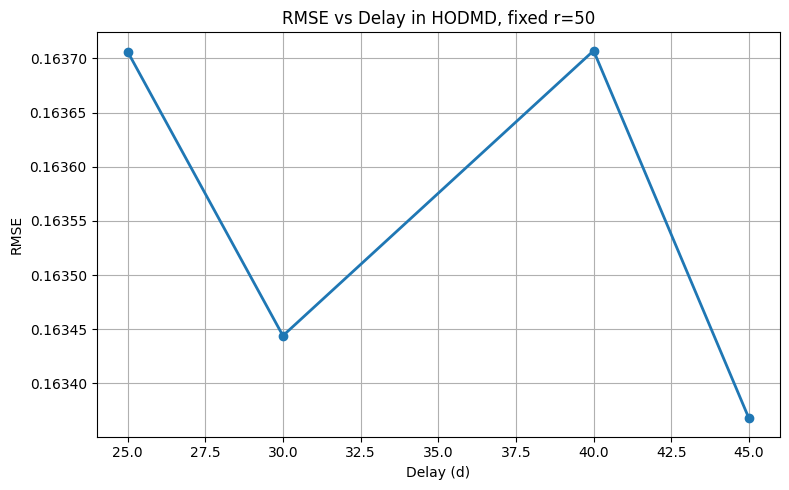

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def delayed_matrix(X, delay):
    n, t = X.shape
    cols = t - delay + 1
    X_delayed = [X[:, i:i+cols] for i in range(delay)]
    return np.vstack(X_delayed)

def tolerance(S, threshold=1e-6):
    S_squared = S**2
    total_energy = np.sum(S_squared)
    cumulative = np.cumsum(S_squared[::-1])[::-1]
    EE = cumulative / total_energy
    N = np.argmax(EE <= threshold)
    return int(N)

def HODMD(X, delay, energy_threshold, dt):
    X_aug = delayed_matrix(X, delay)
    X1 = X_aug[:, :-1]
    X2 = X_aug[:, 1:]

    U, S, Vh = np.linalg.svd(X1, full_matrices=False)
    # r = tolerance(S, energy_threshold)
    r=50

    Ur = U[:, :r].astype(np.complex128)
    Sr = np.diag(S[:r]).astype(np.complex128)
    Vr = Vh.conj().T[:, :r].astype(np.complex128)

    Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr)
    Lambda, W = np.linalg.eig(Atilde)
    Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W

    omega = np.log(Lambda) / dt
    alpha1 = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]

    time_dynamics = None
    for i in range(X1.shape[1]):
        # v = np.array(alpha1)[:, 0] * np.exp(np.array(omega) * (i + 1) * dt)
        v = alpha1 * np.exp(omega * (i + 1) * dt)
        if time_dynamics is None:
            time_dynamics = v
        else:
            time_dynamics = np.vstack((time_dynamics, v))

    X_dmd = np.dot(np.array(Phi), time_dynamics.T)
    return X_dmd, r



def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL']  
    m, n = 199, 449
    dt = 1.0
    energy_threshold = 1e-2

    # delays = [6, 10 , 20, 30]
    delays = [25,30,40,45]
    errors = []
    ranks = []

    for delay in delays:
        print(f"\nRunning HODMD with delay = {delay}")
        X_dmd, r = HODMD(X, delay, energy_threshold, dt)


        X_delayed_true = delayed_matrix(X, delay)[:, :-1].astype(np.float64)

        m = X.shape[0]
        X_dmd_main = X_dmd[-m:, :].astype(np.float64)
        X_true_main = X_delayed_true[-m:, :].astype(np.float64)

        min_t = min(X_dmd_main.shape[1], X_true_main.shape[1])
        # X_dmd_main = X_dmd_main[:, :min_t]
        # X_true_main = X_true_main[:, :min_t]
        X_dmd_main = X_dmd_main[:, :min_t].astype(np.float64)
        X_true_main = X_true_main[:, :min_t].astype(np.float64)

        rmse = np.sqrt(np.mean((X_dmd_main - X_true_main) ** 2)).astype(np.float64)
        
        errors.append(rmse)
        ranks.append(r)
        print(f"Delay d = {delay}, Rank r = {r}, RMSE = {rmse:.6f}")

    plt.figure(figsize=(8, 5))
    plt.plot(delays, errors, marker='o', lw=2)
    plt.xlabel("Delay (d)")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Delay in HODMD, fixed r=50")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# %time main()
if __name__ == '__main__':
    main()


Running HODMD with delay = 25


C:\Users\Cleison\AppData\Local\Temp\ipykernel_28144\725566868.py:55: ComplexWarning: Casting complex values to real discards the imaginary part
  X_dmd_main = X_dmd[-m:, :].astype(np.float64)


Delay d = 25, Rank r = 50, RMSE = 0.163706

Running HODMD with delay = 30
Delay d = 30, Rank r = 60, RMSE = 0.163444

Running HODMD with delay = 40
Delay d = 40, Rank r = 60, RMSE = 0.163707

Running HODMD with delay = 45
Delay d = 45, Rank r = 55, RMSE = 0.163368


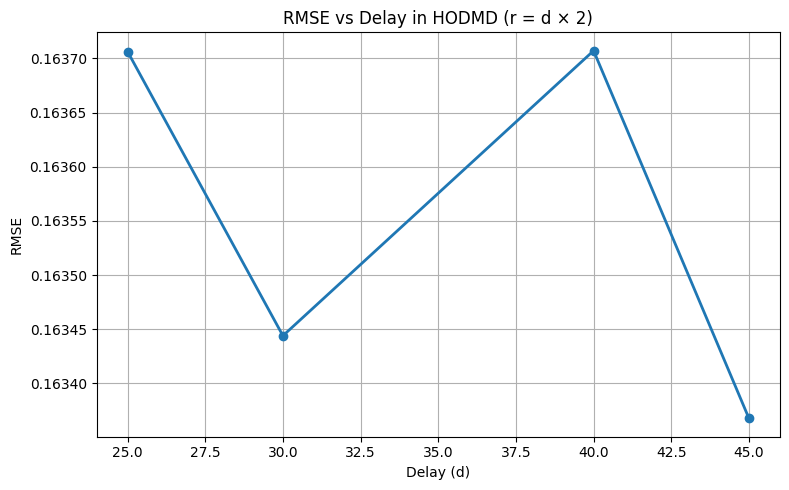

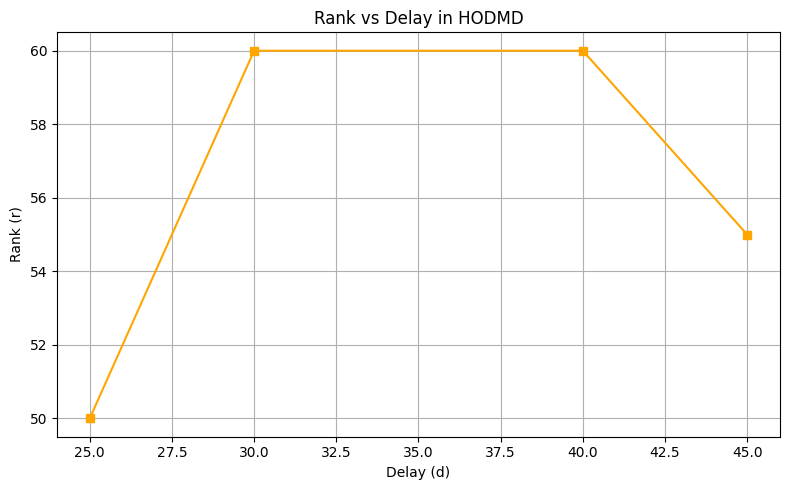

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def delayed_matrix(X, delay):
    n, t = X.shape
    cols = t - delay + 1
    X_delayed = [X[:, i:i+cols] for i in range(delay)]
    return np.vstack(X_delayed)

def HODMD(X, delay, dt):
    X_aug = delayed_matrix(X, delay)
    X1 = X_aug[:, :-1]
    X2 = X_aug[:, 1:]

    U, S, Vh = np.linalg.svd(X1, full_matrices=False)
    
    r = delay * 2  # adaptive rank
    r = min(r, S.shape[0], S.shape[0])  # prevent overflow

    Ur = U[:, :r].astype(np.complex128)
    Sr = np.diag(S[:r]).astype(np.complex128)
    Vr = Vh.conj().T[:, :r].astype(np.complex128)

    Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr)
    Lambda, W = np.linalg.eig(Atilde)
    Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W

    omega = np.log(Lambda) / dt
    alpha1 = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]

    time_dynamics = np.vstack([
        alpha1 * np.exp(omega * (i + 1) * dt)
        for i in range(X1.shape[1])
    ]).T

    X_dmd = Phi @ time_dynamics
    return X_dmd, r

def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL'][:, :100]  
    m = X.shape[0]
    dt = 1.0

    delays = [25, 30, 40, 45]
    errors = []
    ranks = []

    for delay in delays:
        print(f"\nRunning HODMD with delay = {delay}")
        X_dmd, r = HODMD(X, delay, dt)

        X_delayed_true = delayed_matrix(X, delay)[:, :-1].astype(np.float64)
        X_dmd_main = X_dmd[-m:, :].astype(np.float64)
        X_true_main = X_delayed_true[-m:, :].astype(np.float64)

        min_t = min(X_dmd_main.shape[1], X_true_main.shape[1])
        X_dmd_main = X_dmd_main[:, :min_t]
        X_true_main = X_true_main[:, :min_t]

        rmse = np.sqrt(np.mean((X_dmd_main - X_true_main) ** 2))
        errors.append(rmse)
        ranks.append(r)
        print(f"Delay d = {delay}, Rank r = {r}, RMSE = {rmse:.6f}")

    # RMSE vs Delay plot
    plt.figure(figsize=(8, 5))
    plt.plot(delays, errors, marker='o', lw=2)
    plt.xlabel("Delay (d)")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Delay in HODMD (r = d × 2)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Rank vs Delay plot
    plt.figure(figsize=(8, 5))
    plt.plot(delays, ranks, marker='s', color='orange')
    plt.xlabel("Delay (d)")
    plt.ylabel("Rank (r)")
    plt.title("Rank vs Delay in HODMD")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()

# RMSE vs different tolerances values 

Original data X shape: (89351, 100)

--- Threshold = 0.1 ---
[vstack] Constructing delayed matrix
[vstack] delay=50, shape=(4467550, 51)
[HODMD] X1 shape: (4467550, 50), X2 shape: (4467550, 50)
[HODMD] SVD: U=(4467550, 50), S=(50,), Vh=(50, 50)
[HODMD] Selected rank r = 3
[HODMD] X_dmd shape: (4467550, 50)
[vstack] RMSE = 0.256719
[hstack] Constructing delayed matrix
[hstack] delay=50, shape=(4467550, 51)
[HODMD] X1 shape: (4467550, 50), X2 shape: (4467550, 50)
[HODMD] SVD: U=(4467550, 50), S=(50,), Vh=(50, 50)
[HODMD] Selected rank r = 3
[HODMD] X_dmd shape: (4467550, 50)
[hstack] RMSE = 0.256719

--- Threshold = 0.01 ---
[vstack] Constructing delayed matrix
[vstack] delay=50, shape=(4467550, 51)
[HODMD] X1 shape: (4467550, 50), X2 shape: (4467550, 50)
[HODMD] SVD: U=(4467550, 50), S=(50,), Vh=(50, 50)
[HODMD] Selected rank r = 7
[HODMD] X_dmd shape: (4467550, 50)
[vstack] RMSE = 0.166446
[hstack] Constructing delayed matrix
[hstack] delay=50, shape=(4467550, 51)
[HODMD] X1 shape: (44

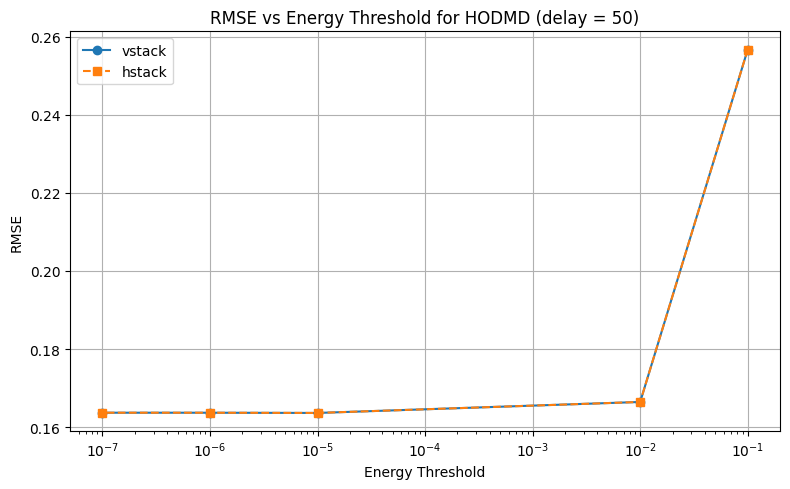

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def delayed_matrix(X, delay):
    n, t = X.shape
    cols = t - delay + 1
    print(f"[vstack] delay={delay}, shape=({delay * n}, {cols})")
    return np.vstack([X[:, i:i+cols] for i in range(delay)])

def delayed_matrix_hstack(X, delay):
    n, t = X.shape
    rows = t - delay + 1
    print(f"[hstack] delay={delay}, shape=({delay * n}, {rows})")
    return np.hstack([X[:, i:i+rows].T for i in range(delay)]).reshape(rows, -1).T

def tolerance(S, threshold=1e-6):
    S_squared = S**2
    total_energy = np.sum(S_squared)
    cumulative = np.cumsum(S_squared[::-1])[::-1]
    EE = cumulative / total_energy
    N = np.argmax(EE <= threshold)
    return int(N)

def HODMD(X_aug, dt, threshold):
    X1 = X_aug[:, :-1]
    X2 = X_aug[:, 1:]

    print(f"[HODMD] X1 shape: {X1.shape}, X2 shape: {X2.shape}")
    U, S, Vh = np.linalg.svd(X1, full_matrices=False)
    print(f"[HODMD] SVD: U={U.shape}, S={S.shape}, Vh={Vh.shape}")

    r = tolerance(S, threshold)
    print(f"[HODMD] Selected rank r = {r}")

    Ur = U[:, :r].astype(np.complex128)
    Sr = np.diag(S[:r]).astype(np.complex128)
    Vr = Vh.conj().T[:, :r].astype(np.complex128)

    Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr)
    Lambda, W = np.linalg.eig(Atilde)
    Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W
    omega = np.log(Lambda) / dt
    b = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]

    time_dynamics = np.zeros((r, X1.shape[1]), dtype=np.complex128)
    for i in range(X1.shape[1]):
        time_dynamics[:, i] = np.exp(omega * ((i + 1) * dt)) * b

    X_dmd = Phi @ time_dynamics
    print(f"[HODMD] X_dmd shape: {X_dmd.shape}")
    return X_dmd.real, r

def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL'][:, :100]
    print(f"Original data X shape: {X.shape}")

    delay = 50
    dt = 1.0
    thresholds = [1e-1, 1e-2, 1e-5, 1e-6, 1e-7]
    errors_v = []
    errors_h = []

    for threshold in thresholds:
        print(f"\n--- Threshold = {threshold} ---")

        # VSTACK
        print("[vstack] Constructing delayed matrix")
        X_aug_v = delayed_matrix(X, delay)
        X_dmd_v, r_v = HODMD(X_aug_v, dt, threshold)
        X_true_v = X_aug_v[:, :-1][:, :X_dmd_v.shape[1]]
        X_dmd_v = X_dmd_v[:X_true_v.shape[0], :]
        rmse_v = np.sqrt(np.mean((X_true_v - X_dmd_v)**2))
        errors_v.append(rmse_v)
        print(f"[vstack] RMSE = {rmse_v:.6f}")

        # HSTACK
        print("[hstack] Constructing delayed matrix")
        X_aug_h = delayed_matrix_hstack(X, delay)
        X_dmd_h, r_h = HODMD(X_aug_h, dt, threshold)
        X_true_h = X_aug_h[:, :-1][:, :X_dmd_h.shape[1]]
        X_dmd_h = X_dmd_h[:X_true_h.shape[0], :]
        rmse_h = np.sqrt(np.mean((X_true_h - X_dmd_h)**2))
        errors_h.append(rmse_h)
        print(f"[hstack] RMSE = {rmse_h:.6f}")

    # Plot RMSE comparison
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, errors_v, 'o-', label='vstack')
    plt.plot(thresholds, errors_h, 's--', label='hstack')
    plt.xscale('log')
    plt.xlabel("Energy Threshold")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Energy Threshold for HODMD (delay = 50)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()


Running HODMD with threshold = 0.1
Rank r = 3, RMSE = 0.256719

Running HODMD with threshold = 0.01
Rank r = 7, RMSE = 0.166446

Running HODMD with threshold = 0.001
Rank r = 9, RMSE = 0.163382

Running HODMD with threshold = 0.0001
Rank r = 13, RMSE = 0.163374

Running HODMD with threshold = 1e-05
Rank r = 17, RMSE = 0.163631

Running HODMD with threshold = 1e-06
Rank r = 21, RMSE = 0.163687

Running HODMD with threshold = 1e-07
Rank r = 24, RMSE = 0.163693

Running HODMD with threshold = 1e-08
Rank r = 27, RMSE = 0.163694


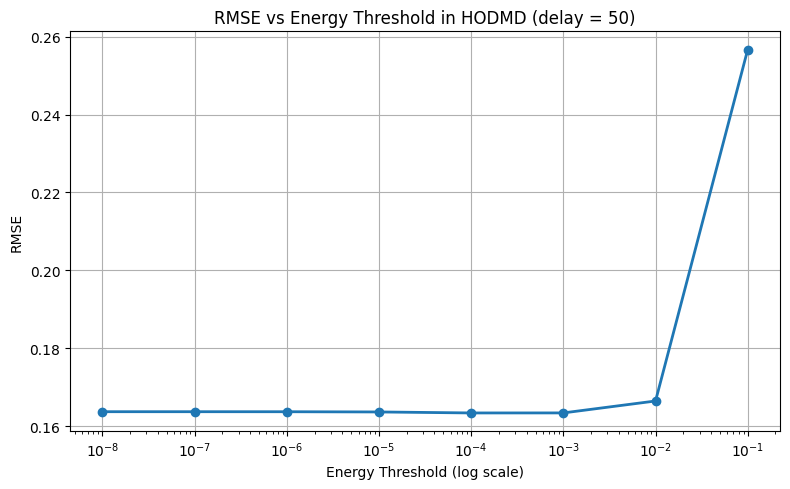

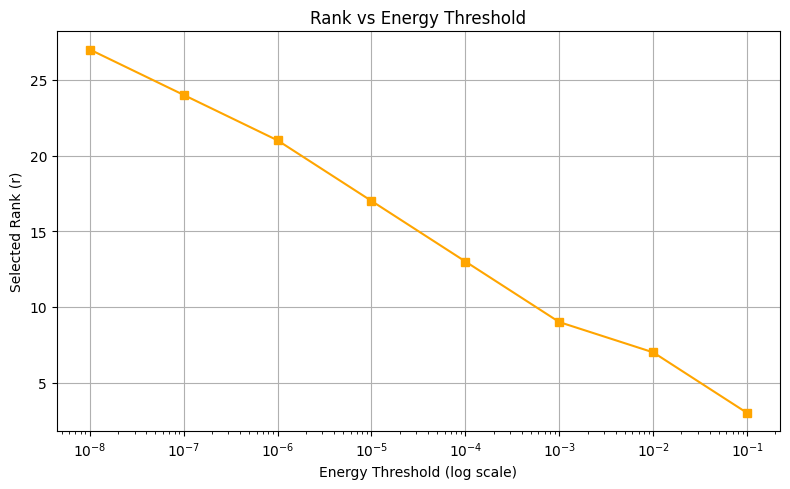

CPU times: total: 21min 59s
Wall time: 5min 26s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def delayed_matrix(X, delay):
    n, t = X.shape
    cols = t - delay + 1
    X_delayed = [X[:, i:i+cols] for i in range(delay)]
    return np.vstack(X_delayed)

def tolerance(S, threshold=1e-6):
    S_squared = S**2
    total_energy = np.sum(S_squared)
    cumulative = np.cumsum(S_squared[::-1])[::-1]
    EE = cumulative / total_energy
    N = np.argmax(EE <= threshold)
    return int(N)

def HODMD(X, delay, energy_threshold, dt):
    X_aug = delayed_matrix(X, delay)
    X1 = X_aug[:, :-1]
    X2 = X_aug[:, 1:]

    U, S, Vh = np.linalg.svd(X1, full_matrices=False)
    r = tolerance(S, energy_threshold)

    Ur = U[:, :r].astype(np.complex128)
    Sr = np.diag(S[:r]).astype(np.complex128)
    Vr = Vh.conj().T[:, :r].astype(np.complex128)

    Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr)
    Lambda, W = np.linalg.eig(Atilde)
    Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W
    omega = np.log(Lambda) / dt

    b = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]

    time_dynamics = np.zeros((r, X1.shape[1]), dtype=np.complex128)
    for i in range(X1.shape[1]):
        time_dynamics[:, i] = np.exp(omega * ((i + 1) * dt)) * b

    X_dmd = Phi @ time_dynamics
    return X_dmd.real, r

def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL'][:, :100]  
    m, n = 199, 449 
    delay = 50
    dt = 1.0

    thresholds = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
    errors = []
    ranks = []

    for threshold in thresholds:
        print(f"\nRunning HODMD with threshold = {threshold}")
        X_dmd, r = HODMD(X, delay, threshold, dt)

        # Rebuild delayed original matrix to match X_dmd shape
        X_trimmed_stack = delayed_matrix(X, delay)[:, :-1]  # skip last to match columns
        X_trimmed_stack = X_trimmed_stack[:, :X_dmd.shape[1]]
        X_dmd = X_dmd[:X_trimmed_stack.shape[0], :]

        rmse = np.sqrt(np.mean((X_trimmed_stack - X_dmd)**2))
        errors.append(rmse)
        ranks.append(r)
        print(f"Rank r = {r}, RMSE = {rmse:.6f}")

    # Plot RMSE vs Threshold
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, errors, marker='o', linewidth=2)
    plt.xscale('log')
    plt.xlabel("Energy Threshold (log scale)")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Energy Threshold in HODMD (delay = 50)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    main()

# HSTACK 


Running HODMD with delay = 25


C:\Users\Cleison\AppData\Local\Temp\ipykernel_28144\422151913.py:55: ComplexWarning: Casting complex values to real discards the imaginary part
  X_dmd_main = X_dmd[-m:, :].astype(np.float64)


Delay d = 25, Rank r = 50, RMSE = 0.519926

Running HODMD with delay = 30
Delay d = 30, Rank r = 60, RMSE = 0.533948

Running HODMD with delay = 40
Delay d = 40, Rank r = 80, RMSE = 0.171022

Running HODMD with delay = 45
Delay d = 45, Rank r = 90, RMSE = 0.530919


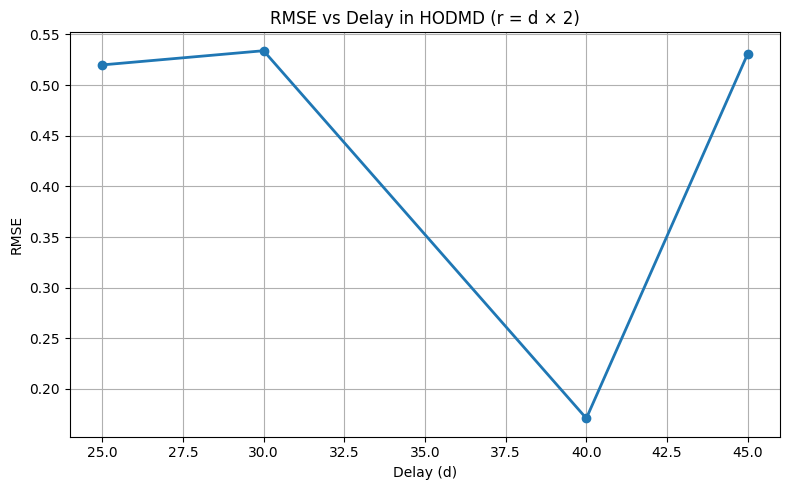

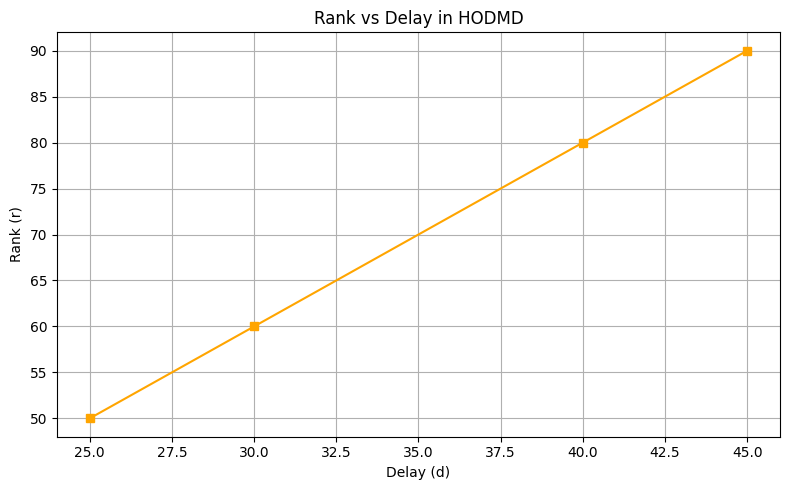

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def delayed_matrix(X, delay):
    n, t = X.shape
    cols = t - delay + 1
    X_delayed = [X[:, i:i+cols] for i in range(delay)]
    return np.hstack(X_delayed)

def HODMD(X, delay, dt):
    X_aug = delayed_matrix(X, delay)
    X1 = X_aug[:, :-1]
    X2 = X_aug[:, 1:]

    U, S, Vh = np.linalg.svd(X1, full_matrices=False)
    
    r = delay * 2  # adaptive rank
    r = min(r, S.shape[0], S.shape[0])  # prevent overflow

    Ur = U[:, :r].astype(np.complex128)
    Sr = np.diag(S[:r]).astype(np.complex128)
    Vr = Vh.conj().T[:, :r].astype(np.complex128)

    Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr)
    Lambda, W = np.linalg.eig(Atilde)
    Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W

    omega = np.log(Lambda) / dt
    alpha1 = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]

    time_dynamics = np.vstack([
        alpha1 * np.exp(omega * (i + 1) * dt)
        for i in range(X1.shape[1])
    ]).T

    X_dmd = Phi @ time_dynamics
    return X_dmd, r

def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL'][:, :100]  
    m = X.shape[0]
    dt = 1.0

    delays = [25, 30, 40, 45]
    errors = []
    ranks = []

    for delay in delays:
        print(f"\nRunning HODMD with delay = {delay}")
        X_dmd, r = HODMD(X, delay, dt)

        X_delayed_true = delayed_matrix(X, delay)[:, :-1].astype(np.float64)
        X_dmd_main = X_dmd[-m:, :].astype(np.float64)
        X_true_main = X_delayed_true[-m:, :].astype(np.float64)

        min_t = min(X_dmd_main.shape[1], X_true_main.shape[1])
        X_dmd_main = X_dmd_main[:, :min_t]
        X_true_main = X_true_main[:, :min_t]

        rmse = np.sqrt(np.mean((X_dmd_main - X_true_main) ** 2))
        errors.append(rmse)
        ranks.append(r)
        print(f"Delay d = {delay}, Rank r = {r}, RMSE = {rmse:.6f}")

    # RMSE vs Delay plot
    plt.figure(figsize=(8, 5))
    plt.plot(delays, errors, marker='o', lw=2)
    plt.xlabel("Delay (d)")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Delay in HODMD (r = d × 2)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Rank vs Delay plot
    plt.figure(figsize=(8, 5))
    plt.plot(delays, ranks, marker='s', color='orange')
    plt.xlabel("Delay (d)")
    plt.ylabel("Rank (r)")
    plt.title("Rank vs Delay in HODMD")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()


Running HODMD with threshold = 0.1
Rank r = 3, RMSE = 0.546579

Running HODMD with threshold = 0.01
Rank r = 7, RMSE = 0.537537

Running HODMD with threshold = 0.001
Rank r = 9, RMSE = 0.537509

Running HODMD with threshold = 0.0001
Rank r = 13, RMSE = 0.536247

Running HODMD with threshold = 1e-05
Rank r = 17, RMSE = 0.536233

Running HODMD with threshold = 1e-06
Rank r = 21, RMSE = 0.536230

Running HODMD with threshold = 1e-07
Rank r = 24, RMSE = 0.536229

Running HODMD with threshold = 1e-08
Rank r = 27, RMSE = 0.536229


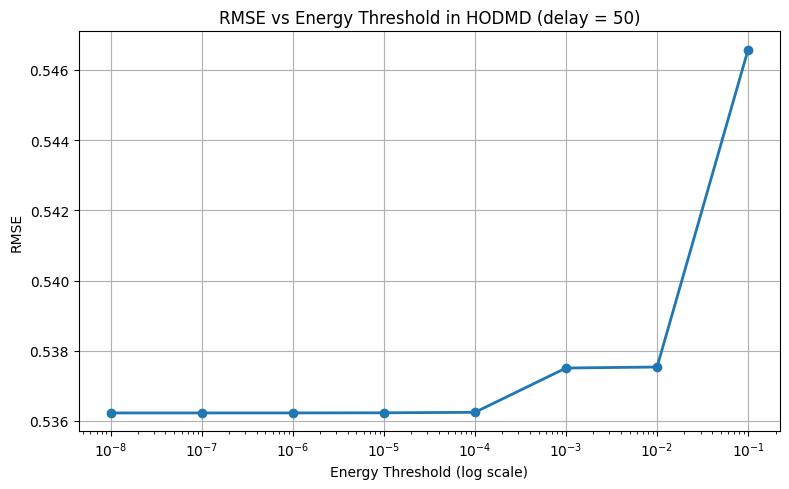

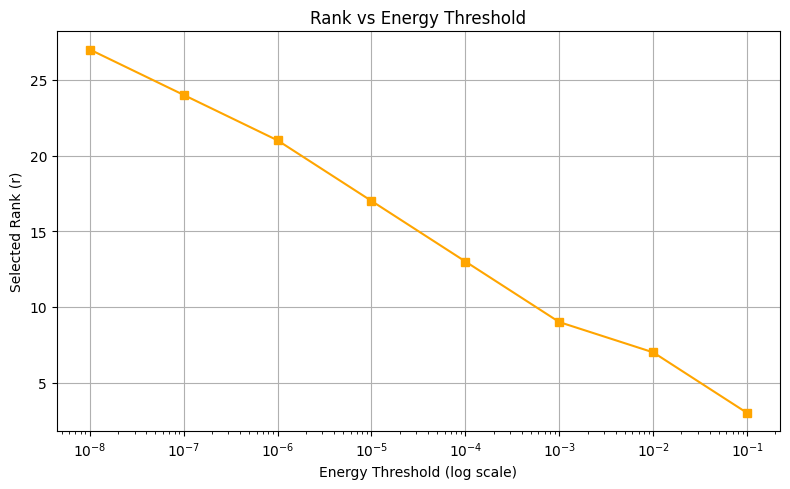

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def delayed_matrix(X, delay):
    n, t = X.shape
    cols = t - delay + 1
    X_delayed = [X[:, i:i+cols] for i in range(delay)]
    return np.hstack(X_delayed)

def tolerance(S, threshold=1e-6):
    S_squared = S**2
    total_energy = np.sum(S_squared)
    cumulative = np.cumsum(S_squared[::-1])[::-1]
    EE = cumulative / total_energy
    N = np.argmax(EE <= threshold)
    return int(N)

def HODMD(X, delay, energy_threshold, dt):
    X_aug = delayed_matrix(X, delay)
    X1 = X_aug[:, :-1]
    X2 = X_aug[:, 1:]

    U, S, Vh = np.linalg.svd(X1, full_matrices=False)
    r = tolerance(S, energy_threshold)

    Ur = U[:, :r].astype(np.complex128)
    Sr = np.diag(S[:r]).astype(np.complex128)
    Vr = Vh.conj().T[:, :r].astype(np.complex128)

    Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr)
    Lambda, W = np.linalg.eig(Atilde)
    Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W
    omega = np.log(Lambda) / dt

    b = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]

    time_dynamics = np.zeros((r, X1.shape[1]), dtype=np.complex128)
    for i in range(X1.shape[1]):
        time_dynamics[:, i] = np.exp(omega * ((i + 1) * dt)) * b

    X_dmd = Phi @ time_dynamics
    return X_dmd.real, r

def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL'][:, :100]  
    m, n = 199, 449 
    delay = 50
    dt = 1.0

    thresholds = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
    errors = []
    ranks = []

    for threshold in thresholds:
        print(f"\nRunning HODMD with threshold = {threshold}")
        X_dmd, r = HODMD(X, delay, threshold, dt)

        # Rebuild delayed original matrix to match X_dmd shape
        X_trimmed_stack = delayed_matrix(X, delay)[:, :-1]  # skip last to match columns
        X_trimmed_stack = X_trimmed_stack[:, :X_dmd.shape[1]]
        X_dmd = X_dmd[:X_trimmed_stack.shape[0], :]

        rmse = np.sqrt(np.mean((X_trimmed_stack - X_dmd)**2))
        errors.append(rmse)
        ranks.append(r)
        print(f"Rank r = {r}, RMSE = {rmse:.6f}")

    # Plot RMSE vs Threshold
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, errors, marker='o', linewidth=2)
    plt.xscale('log')
    plt.xlabel("Energy Threshold (log scale)")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Energy Threshold in HODMD (delay = 50)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Optional: also plot rank vs threshold
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, ranks, marker='s', color='orange')
    plt.xscale('log')
    plt.xlabel("Energy Threshold (log scale)")
    plt.ylabel("Selected Rank (r)")
    plt.title("Rank vs Energy Threshold")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

(89351, 2550)
x1shape 2549
Selected rank r = 21 based on energy threshold 1e-06
x_dmd (89351, 2549)
(89351, 51)


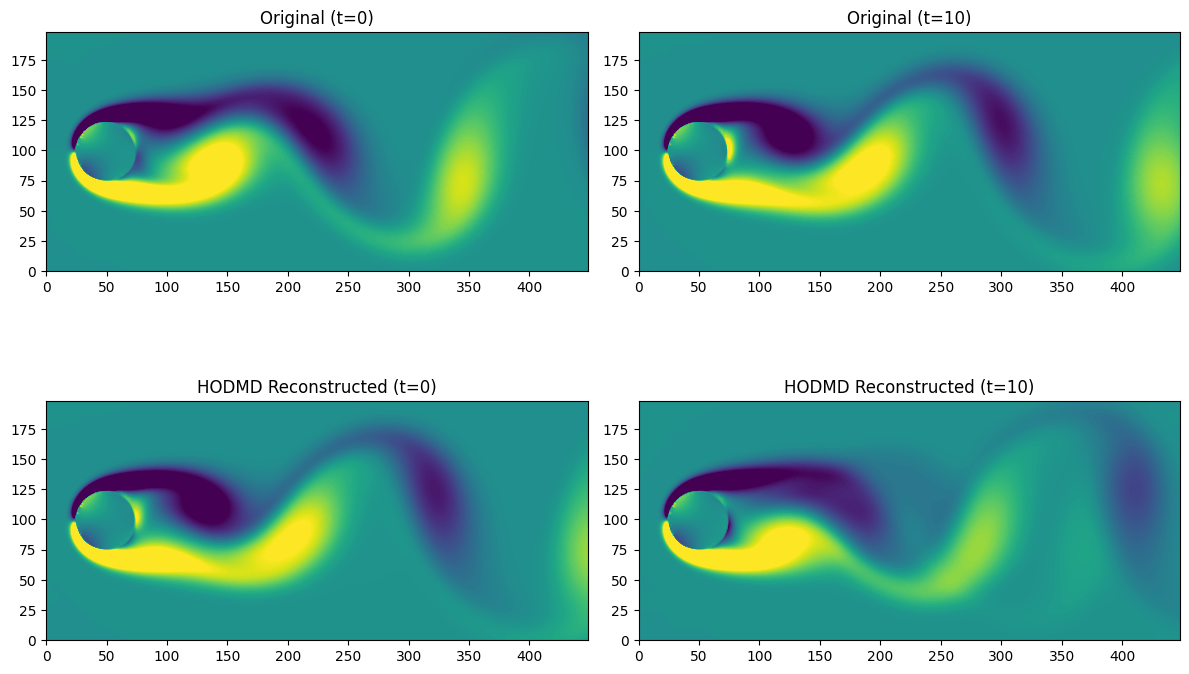

CPU times: total: 14min 12s
Wall time: 1min 56s


In [23]:
# %%timeit
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

def delayed_matrix(X, delay):
    n, t = X.shape
    cols = t - delay + 1
    X_delayed = [X[:, i:i+cols] for i in range(delay)]
    return np.hstack(X_delayed)

def tolerance(S, threshold=1e-6):
    S_squared = S**2
    total_energy = np.sum(S_squared)
    cumulative = np.cumsum(S_squared[::-1])[::-1]
    EE = cumulative / total_energy
    N = np.argmax(EE <= threshold)
    return int(N)

def HODMD(X, delay, energy_threshold, dt):
    X_aug = delayed_matrix(X, delay)
    print(np.shape(X_aug))
    X1 = X_aug[:, :-1]
    X2 = X_aug[:, 1:]

    U, S, Vh = np.linalg.svd(X1, full_matrices=False)
    r = tolerance(S, energy_threshold)

    Ur = U[:, :r].astype(np.complex128)
    Sr = np.diag(S[:r]).astype(np.complex128)
    Vr = Vh.conj().T[:, :r].astype(np.complex128)

    Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr)
    Lambda, W = np.linalg.eig(Atilde)
    Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W
    omega = np.log(Lambda) / dt

    alpha1 = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]

    time_dynamics = np.zeros((r, X1.shape[1]), dtype=np.complex128)
    print("x1shape",X1.shape[1])
    for i in range(X1.shape[1]):
        time_dynamics[:, i] = alpha1 * np.exp(omega * ((i + 1) * dt))

    X_dmd = Phi @ time_dynamics
    return X_dmd, r

def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL'][:, :100]  
    m, n = 199, 449 
    delay = 50
    dt = 1.0  
    energy_threshold = 1e-6

    X_dmd, r = HODMD(X, delay, energy_threshold, dt)
    print(f"Selected rank r = {r} based on energy threshold {energy_threshold}")
    print("x_dmd",X_dmd.shape)

    X_trimmed = X[:, delay - 1:]
    print(X_trimmed.shape)

    X_dmd_trimmed = X_dmd[:449*199,:]
    
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    ax[0, 0].contourf(np.reshape(X_trimmed[:, 0], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[0, 0].set_title("Original (t=0)")
    ax[0, 0].set_aspect('equal')

    ax[0, 1].contourf(np.reshape(X_trimmed[:, 10], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[0, 1].set_title("Original (t=10)")
    ax[0, 1].set_aspect('equal')

    ax[1, 0].contourf(np.reshape(X_dmd_trimmed[:, 0], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[1, 0].set_title("HODMD Reconstructed (t=0)")
    ax[1, 0].set_aspect('equal')

    ax[1, 1].contourf(np.reshape(X_dmd_trimmed[:, 10], (n, m)).T, levels=1001, vmin=-2, vmax=2)
    ax[1, 1].set_title("HODMD Reconstructed (t=10)")
    ax[1, 1].set_aspect('equal')

    plt.tight_layout()
    plt.show()

#just time main function not plots, fix it my genious friend 
%time main()

# TENSOR PYTORCH (STILL NEEDS IMPROVEMENT)

torch.Size([4467550, 51])
Execution time: 25.8744 seconds
Selected rank r = 21
X_dmd shape: torch.Size([4467550, 50])


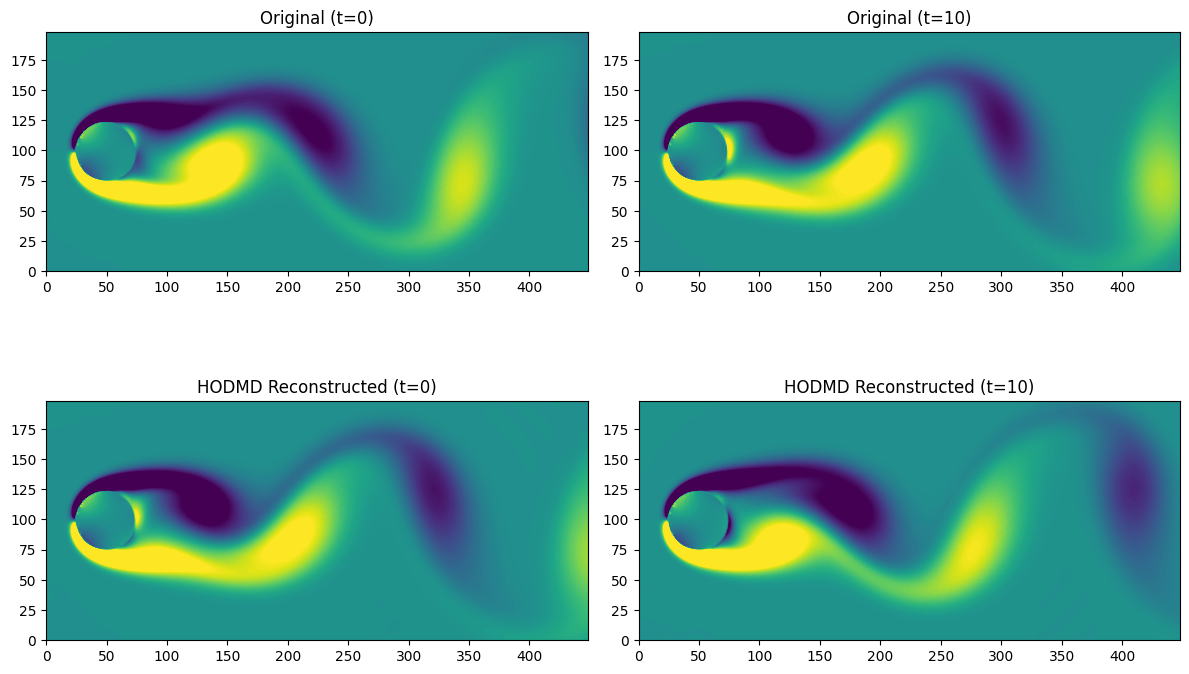

In [24]:
import torch
import matplotlib.pyplot as plt
from scipy import io
import time

def delayed_matrix(X, delay):
    n, t = X.shape
    cols = t - delay + 1
    X_delayed = [X[:, i:i+cols] for i in range(delay)]
    return torch.cat(X_delayed, dim=0)

def tolerance(S, threshold=1e-6):
    S_squared = S**2
    total_energy = torch.sum(S_squared)
    cumulative = torch.cumsum(S_squared.flip(0), dim=0).flip(0)
    EE = cumulative / total_energy
    N = torch.nonzero(EE <= threshold)
    return int(N[0]) if len(N) > 0 else len(S)

def HODMD(X, delay, energy_threshold, dt):
    X_aug = delayed_matrix(X, delay)
    print(X_aug.shape)
    X1 = X_aug[:, :-1]
    X2 = X_aug[:, 1:]

    # Use double precision
    U, S, Vh = torch.linalg.svd(X1, full_matrices=False)
    r = tolerance(S, energy_threshold)

    Ur = U[:, :r].to(dtype=torch.complex128)
    Sr = torch.diag(S[:r]).to(dtype=torch.complex128)
    Vr = Vh.conj().T[:, :r].to(dtype=torch.complex128)
    X2_c = X2.to(dtype=torch.complex128)

    Atilde = Ur.conj().T @ X2_c @ Vr @ torch.linalg.inv(Sr)
    Lambda, W = torch.linalg.eig(Atilde)
    Phi = X2_c @ Vr @ torch.linalg.inv(Sr) @ W
    omega = torch.log(Lambda) / dt

    alpha1 = torch.linalg.lstsq(Phi, X1[:, 0].to(dtype=torch.complex128)).solution

    time_dynamics = torch.zeros((r, X1.shape[1]), dtype=torch.complex128)
    for i in range(X1.shape[1]):
        time_dynamics[:, i] = alpha1 * torch.exp(omega * ((i + 1) * dt))

    X_dmd = Phi @ time_dynamics
    return X_dmd.real.to(dtype=torch.float64), r

def main():
    vortall_mat = io.loadmat('VORTALL.mat')
    X_np = vortall_mat['VORTALL'][:, :100]
    X = torch.tensor(X_np, dtype=torch.float64)

    m, n = 199, 449
    delay = 50
    dt = 1.0
    energy_threshold = 1e-6

    start = time.time()
    X_dmd, r = HODMD(X, delay, energy_threshold, dt)
    end = time.time()

    print(f"Execution time: {end - start:.4f} seconds")
    print(f"Selected rank r = {r}")
    print("X_dmd shape:", X_dmd.shape)

    X_trimmed = X[:, delay - 1:]
    X_dmd_trimmed = X_dmd[:n * m, :]

    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    ax[0, 0].contourf(X_trimmed[:, 0].reshape(n, m).T, levels=1001, vmin=-2, vmax=2)
    ax[0, 0].set_title("Original (t=0)")
    ax[0, 0].set_aspect('equal')

    ax[0, 1].contourf(X_trimmed[:, 10].reshape(n, m).T, levels=1001, vmin=-2, vmax=2)
    ax[0, 1].set_title("Original (t=10)")
    ax[0, 1].set_aspect('equal')

    ax[1, 0].contourf(X_dmd_trimmed[:, 0].reshape(n, m).T, levels=1001, vmin=-2, vmax=2)
    ax[1, 0].set_title("HODMD Reconstructed (t=0)")
    ax[1, 0].set_aspect('equal')

    ax[1, 1].contourf(X_dmd_trimmed[:, 10].reshape(n, m).T, levels=1001, vmin=-2, vmax=2)
    ax[1, 1].set_title("HODMD Reconstructed (t=10)")
    ax[1, 1].set_aspect('equal')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

In [25]:
A=np.array([1,2,3,5])
print(A.shape)

(4,)
